In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import calendar

In [2]:
#dict of codes and abrevvation
regions = {
    'gb20' : '2020_GB_Region_Mobility_Report.csv',
    'gb21' : '2021_GB_Region_Mobility_Report.csv',
    'ca21' : '2021_CA_Region_Mobility_Report.csv',
    'ca20' : '2020_CA_Region_Mobility_Report.csv',
    'glob' : 'Global_Mobility_Report.csv'}

# dict for list of london boroughs
# https://en.wikipedia.org/wiki/List_of_London_boroughs
#iso_3166_2_code: Second-level subdivisions
# https://en.wikipedia.org/wiki/ISO_3166-2:GB
london = {
    'GB-LND' :'City of London',
    'GB-BDG' :'Barking and Dagenham',
    'GB-BNE' :'Barnet',
    'GB-BEX' :'Bexley',
    'GB-BEN' :'Brent',
    'GB-BRY' :'Bromley',
    'GB-CMD' :'Camden',
    'GB-CRY' :'Croydon',
    'GB-EAL' :'Ealing',
    'GB-ENF' :'Enfield',
    'GB-GRE' :'Greenwich',
    'GB-HCK' :'Hackney',
    'GB-HMF' :'Hammersmith and Fulham',
    'GB-HRY' :'Haringey',
    'GB-HRW' :'Harrow',
    'GB-HAV' :'Havering',
    'GB-HIL' :'Hillingdon',
    'GB-HNS' :'Hounslow',
    'GB-ISL' :'Islington',
    'GB-KEC' :'Kensington and Chelsea',
    'GB-KTT' :'Kingston upon Thames',
    'GB-LBH' :'Lambeth',
    'GB-LEW' :'Lewisham',
    'GB-MRT' :'Merton',
    'GB-NWM' :'Newham',
    'GB-RDB' :'Redbridge',
    'GB-RIC' :'Richmond upon Thames',
    'GB-SWK' :'Southwark',
    'GB-STN' :'Sutton',
    'GB-TWH' :'Tower Hamlets',
    'GB-WFT' :'Waltham Forest',
    'GB-WND' :'Wandsworth',
    'GB-WSM' :'Westminster'}

#mobility full category names included in google data
f_cats = {          
    'retail' : 'retail_and_recreation_percent_change_from_baseline',
    'grocery':'grocery_and_pharmacy_percent_change_from_baseline',
    'parks':'parks_percent_change_from_baseline',
    'transit':'transit_stations_percent_change_from_baseline',
    'workplace':'workplaces_percent_change_from_baseline',
    'residential':'residential_percent_change_from_baseline'}

pay_cats = { 
    0: 'Total, weekly',
    1:'Total, Hourly',
    2: 'Full-time, Weekly',
    3: 'Full-time, Hourly',
    4: 'Part-Time, Weekly',
    5: 'Part-time, Hourly',
    6: 'Male, Weekly',
    7: 'Male, Hourly', 
    8: 'Female, Weekly',
    9: 'Female, Hourly'}

In [3]:
#data import

#mobility data
#https://www.google.com/covid19/mobility/index.html?hl=en
region = 'gb20'
g_mobility = pd.read_csv(f'data/{regions[region]}')

#london income
# from https://data.london.gov.uk/dataset/earnings-place-residence-borough
income = pd.read_excel('data/earnings-residence-borough.xlsx',
     engine='openpyxl',sheet_name = None
                      )

## clean sheet 1
del income['Metadata'] #del metadata sheet

#covid data london

#https://data.london.gov.uk/dataset/coronavirus--covid-19--cases
case = pd.read_csv('data/phe_cases_london_boroughs.csv')

#https://data.london.gov.uk/dataset/coronavirus--covid-19--deaths
death = pd.read_csv('data/ons_deaths_weekly_occurrences_by_la_location.csv')

In [4]:
#clean google data
g_mobility.dropna(axis=1, how='all',inplace = True) #delete all null cols

# sub-region 1: 152 UK counties/cities
#https://en.wikipedia.org/wiki/Districts_of_England

g_mobility.drop(g_mobility[g_mobility['sub_region_1'].isna()==True].index,
                inplace = True)                      #delete na regions

gl = g_mobility[g_mobility['sub_region_1'].str.contains('London')] # limit to greater london

# sub-region 2: 268 UK districts
#https://en.wikipedia.org/wiki/Districts_of_England

gl.drop(gl[gl['sub_region_2'].isna()==True].index,inplace = True) #delete na regions2

gl['weekday'] = gl.apply(   
     lambda x: datetime.strptime(x['date'],'%Y-%m-%d').weekday(), axis=1)  # Monday = 0


gl.head()

/home/traaka/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/traaka/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,weekday
36574,GB,United Kingdom,Greater London,City of London,GB-LND,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-15,-5.0,-9.0,-12.0,-11.0,NaN,NaN,5
36575,GB,United Kingdom,Greater London,City of London,GB-LND,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-16,-1.0,-21.0,-23.0,-13.0,NaN,NaN,6
36576,GB,United Kingdom,Greater London,City of London,GB-LND,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-17,-3.0,-2.0,4.0,-1.0,-4.0,NaN,0
36577,GB,United Kingdom,Greater London,City of London,GB-LND,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-18,-2.0,-2.0,-1.0,-2.0,-2.0,NaN,1
36578,GB,United Kingdom,Greater London,City of London,GB-LND,ChIJ4Y3fTlUDdkgR0Gbsoi2uDgQ,2020-02-19,-7.0,-4.0,5.0,0.0,-4.0,NaN,2


In [5]:
# clean income
def cln_income(df):
    df.drop(df.columns[tuple([range(2,36)])],
            axis =1,inplace =True) #keep only 2019 and 2020 data
    df.rename(columns={2019: "2019 pay", 
                       "Unnamed: 37": "2019 conf %",
                      2020: "2020 pay",
                      "Unnamed: 39": "2020 conf %" }, inplace = True)
              
    df.dropna(axis=0, how='all',inplace = True)
    df.drop([0,2],axis=0,inplace =True)   #data from city of london is missing
    df.reset_index(inplace=True,drop=True)
    return df
 
income = {k: cln_income(v) for k, v in income.items()}

In [6]:
#clean cases
case.drop('area_code',axis=1,inplace=True)
case = case[(case['date']>=gl['date'].iloc[0]) &    #adjust dates to google data
         (case['date']<=gl['date'].iloc[-1])].reset_index(drop=True)

case['weekday'] = case.apply(   
     lambda x: datetime.strptime(x['date'],'%Y-%m-%d').weekday(), axis=1)  # Monday = 0

case.replace('Hackney and City of London', 'Hackney',inplace=True)   
#Warning: cases of the two borroughs are repoted together

In [7]:
# total cases in areas
for n in list(london.values())[1:]:
    print(n,':',max(case['total_cases'][case['area_name']==n]))

Barking and Dagenham : 13559
Barnet : 17408
Bexley : 13975
Brent : 14550
Bromley : 15237
Camden : 8352
Croydon : 16950
Ealing : 15838
Enfield : 18058
Greenwich : 12388
Hackney : 13294
Hammersmith and Fulham : 7550
Haringey : 12107
Harrow : 11632
Havering : 18153
Hillingdon : 14133
Hounslow : 12548
Islington : 8947
Kensington and Chelsea : 5315
Kingston upon Thames : 7579
Lambeth : 13651
Lewisham : 12103
Merton : 9322
Newham : 20041
Redbridge : 20502
Richmond upon Thames : 6716
Southwark : 12753
Sutton : 9054
Tower Hamlets : 18084
Waltham Forest : 14990
Wandsworth : 13207
Westminster : 8365


In [8]:
# draw figs

#inputs
p = pay_cats[8]   #income category 

# code 1 has the most cases, code 2 has one of the least with comparable population
code1 = 'GB-ENF' 
code2 = 'GB-WSM'
cat = 'residential'  #mobility category


# seperate relevant data base on inputs
pay_ind = income[p][income[p]['Code'].str.contains('00')==True] #32 boroughs in selected p
bor_pay1 = pay_ind[pay_ind['Area']==london[code1]].reset_index(drop=True)
bor_pay2 = pay_ind[pay_ind['Area']==london[code2]].reset_index(drop=True)

bor_mob1 = gl[gl['iso_3166_2_code']==code1].reset_index(drop=True)
bor_mob2 = gl[gl['iso_3166_2_code']==code2].reset_index(drop=True)

bor_case1 = case[case['area_name']==london[code1]].reset_index(drop=True)
bor_case2 = case[case['area_name']==london[code2]].reset_index(drop=True)

rolling_windows = bor_case1['new_cases'].rolling(7, min_periods=1)
bor_case1['Last 7 days cases'] = rolling_windows.sum()
bor_mob_cat1 = bor_mob1[f_cats[cat]]

rolling_windows = bor_case2['new_cases'].rolling(7, min_periods=1)
bor_case2['Last 7 days cases'] = rolling_windows.sum()
bor_mob_cat2 = bor_mob2[f_cats[cat]]

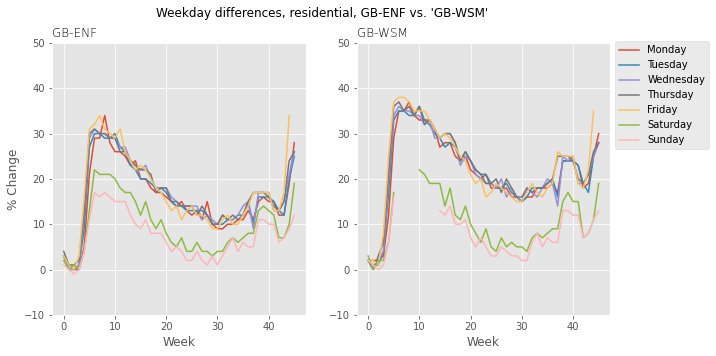

In [11]:
# weekday differences in mobility

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle(f"Weekday differences, {cat}, {code1} vs. '{code2}'")
plt.style.use('ggplot')
 
for d in range(7):
    y = bor_mob_cat1[bor_mob1['weekday']==d]
    x = range(len(y))
    ax1.plot(x, y ,label=calendar.day_name[d])

ax1.set_xlabel("Week")
ax1.set_ylabel("% Change")
ax1.set_ylim([-10, 50])  
ax1.set_title(code1, 
          loc='left', fontsize=12, fontweight=0, color='black')

for d in range(7):
    y = bor_mob_cat2[bor_mob2['weekday']==d]
    x = range(len(y))
    ax2.plot(x, y ,label=calendar.day_name[d])

ax2.set_xlabel("Week")
ax2.set_ylim([-10, 50])
ax2.set_title(code2, 
          loc='left', fontsize=12, fontweight=0, color='black')
    


plt.legend(loc=2, ncol=1,bbox_to_anchor=(1,1.025))
plt.show()

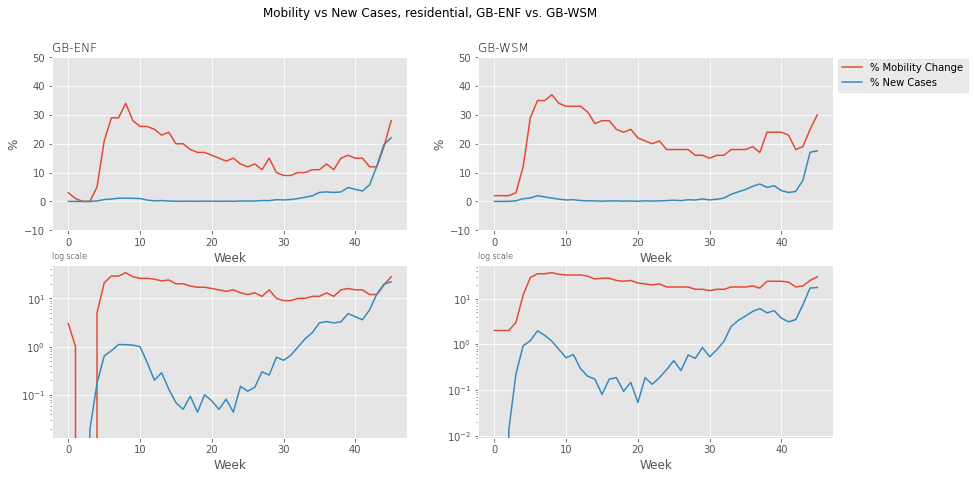

In [12]:
#inputs
d = 0  #day of the week

# case vs mobility
fig, axs = plt.subplots(2, 2,figsize=(14,7))
fig.suptitle(f"Mobility vs New Cases, {cat}, {code1} vs. {code2}")
plt.style.use('ggplot')

#code 1
total_cases1 = bor_case1['total_cases'][bor_case1['weekday']==d].iloc[-1]
y1 = bor_mob_cat1[bor_mob1['weekday']==d]
y2 = bor_case1['Last 7 days cases'][bor_case1['weekday']==d]/total_cases1*100
x = range(len(y1))


ax = axs[0,0]
ax.plot(x,y1 ,label='Mobility')
ax.plot(x,y2 ,label='% New Cases')
ax.set_xlabel("Week")
ax.set_ylabel("%")
ax.set_ylim([-10, 50])  
ax.set_title(code1, 
          loc='left', fontsize=12, fontweight=0, color='black')

ax = axs[1,0]
ax.semilogy(x,y1 ,label='% Mobility Change')
ax.semilogy(x,y2 ,label='% New Cases')
ax.set_xlabel("Week")
ax.set_title('log scale', 
          loc='left', fontsize=8, fontweight=0, color='black')


#code 2
total_cases2 = bor_case2['total_cases'][bor_case2['weekday']==d].iloc[-1]
y1 = bor_mob_cat2[bor_mob2['weekday']==d]
y2 = bor_case2['Last 7 days cases'][bor_case2['weekday']==d]/total_cases2*100
x = range(len(y1))


ax = axs[0,1]
ax.plot(x,y1 ,label='Mobility')
ax.plot(x,y2 ,label='% New Cases')
ax.set_xlabel("Week")
ax.set_ylabel("%")
ax.set_ylim([-10, 50])  
ax.set_title(code2, 
          loc='left', fontsize=12, fontweight=0, color='black')

ax = axs[1,1]
ax.semilogy(x,y1 ,label='% Mobility Change')
ax.semilogy(x,y2 ,label='% New Cases')
ax.set_xlabel("Week")
ax.set_title('log scale', 
          loc='left', fontsize=8, fontweight=0, color='black')



plt.legend(loc=2, ncol=1,bbox_to_anchor=(1,2.22))
plt.show()


